# Wine Quality (Red + White)

> https://archive.ics.uci.edu/dataset/186/wine+quality

## Import Dataset

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.constants import degree
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report


In [2]:
df_ww = pd.read_csv("dataset/winequality/winequality-white.csv", sep=";")  # red wine
df_rw = pd.read_csv("dataset/winequality/winequality-red.csv", sep=";")  # white wine

df_wine = pd.concat([df_ww, df_rw], axis=0, ignore_index=True)
df_wine


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0             0.270         0.36            20.7      0.045   
1               6.3             0.300         0.34             1.6      0.049   
2               8.1             0.280         0.40             6.9      0.050   
3               7.2             0.230         0.32             8.5      0.058   
4               7.2             0.230         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
6492            6.2             0.600         0.08             2.0      0.090   
6493            5.9             0.550         0.10             2.2      0.062   
6494            6.3             0.510         0.13             2.3      0.076   
6495            5.9             0.645         0.12             2.0      0.075   
6496            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    45.0                 170.0  1.00100  3.00       0.45   
1                    14.0                 132.0  0.99400  3.30       0.49   
2                    30.0                  97.0  0.99510  3.26       0.44   
3                    47.0                 186.0  0.99560  3.19       0.40   
4                    47.0                 186.0  0.99560  3.19       0.40   
...                   ...                   ...      ...   ...        ...   
6492                 32.0                  44.0  0.99490  3.45       0.58   
6493                 39.0                  51.0  0.99512  3.52       0.76   
6494                 29.0                  40.0  0.99574  3.42       0.75   
6495                 32.0                  44.0  0.99547  3.57       0.71   
6496                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         8.8        6  
1         9.5        6  
2        10.1        6  
3         9.9        6  
4         9.9        6  
...       ...      ...  
6492     10.5        5  
6493     11.2        6  
6494     11.0        6  
6495     10.2        5  
6496     11.0        6  

[6497 rows x 12 columns]

## Data Analysis

In [3]:
df_wine.shape


(6497, 12)

In [4]:
# data info after removing duplicate
df_wine.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 609.2 KB


In [5]:
df_wine.describe()


fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        7.215307          0.339666     0.318633        5.443235   
std         1.296434          0.164636     0.145318        4.757804   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6497.000000          6497.000000           6497.000000  6497.000000   
mean      0.056034            30.525319            115.744574     0.994697   
std       0.035034            17.749400             56.521855     0.002999   
min       0.009000             1.000000              6.000000     0.987110   
25%       0.038000            17.000000             77.000000     0.992340   
50%       0.047000            29.000000            118.000000     0.994890   
75%       0.065000            41.000000            156.000000     0.996990   
max       0.611000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  6497.000000  6497.000000  6497.000000  6497.000000  
mean      3.218501     0.531268    10.491801     5.818378  
std       0.160787     0.148806     1.192712     0.873255  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.110000     0.430000     9.500000     5.000000  
50%       3.210000     0.510000    10.300000     6.000000  
75%       3.320000     0.600000    11.300000     6.000000  
max       4.010000     2.000000    14.900000     9.000000

In [6]:
# red wine quality distribution
df_wine["quality"].value_counts()


quality
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: count, dtype: int64

<Axes: ylabel='count'>

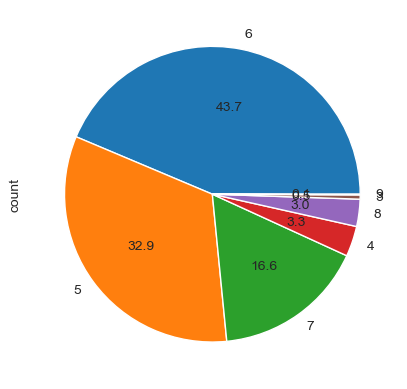

In [7]:
df_wine["quality"].value_counts().plot(kind="pie", autopct="%1.1f")


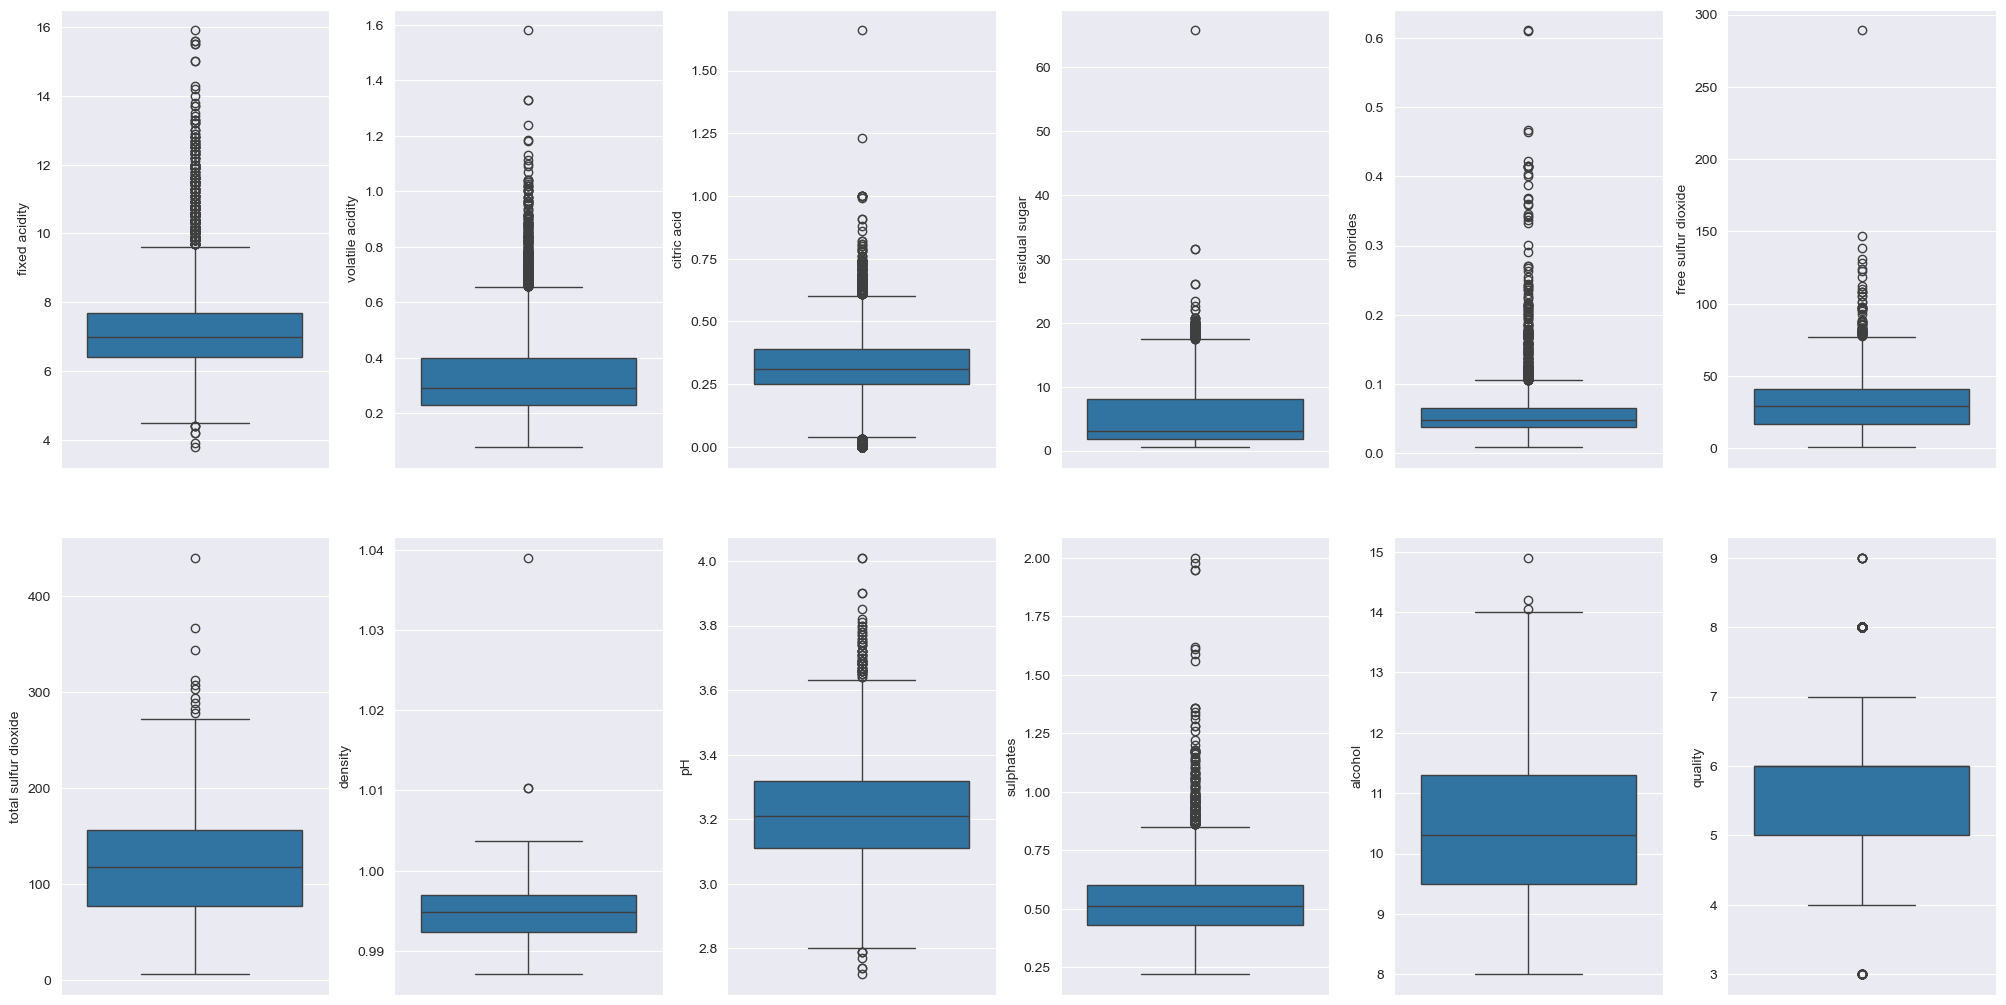

In [8]:
# create box plots
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20, 10))
index = 0
ax = ax.flatten()

for col, value in df_wine.items():
    if col != "type":
        sns.boxplot(y=col, data=df_wine, ax=ax[index])
        index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)


In [9]:
# remove outliers using Z-score
from scipy import stats

z = np.abs(stats.zscore(df_wine))
df_wine = df_wine[(z < 3).all(axis=1)]

df_wine.shape


(5989, 12)

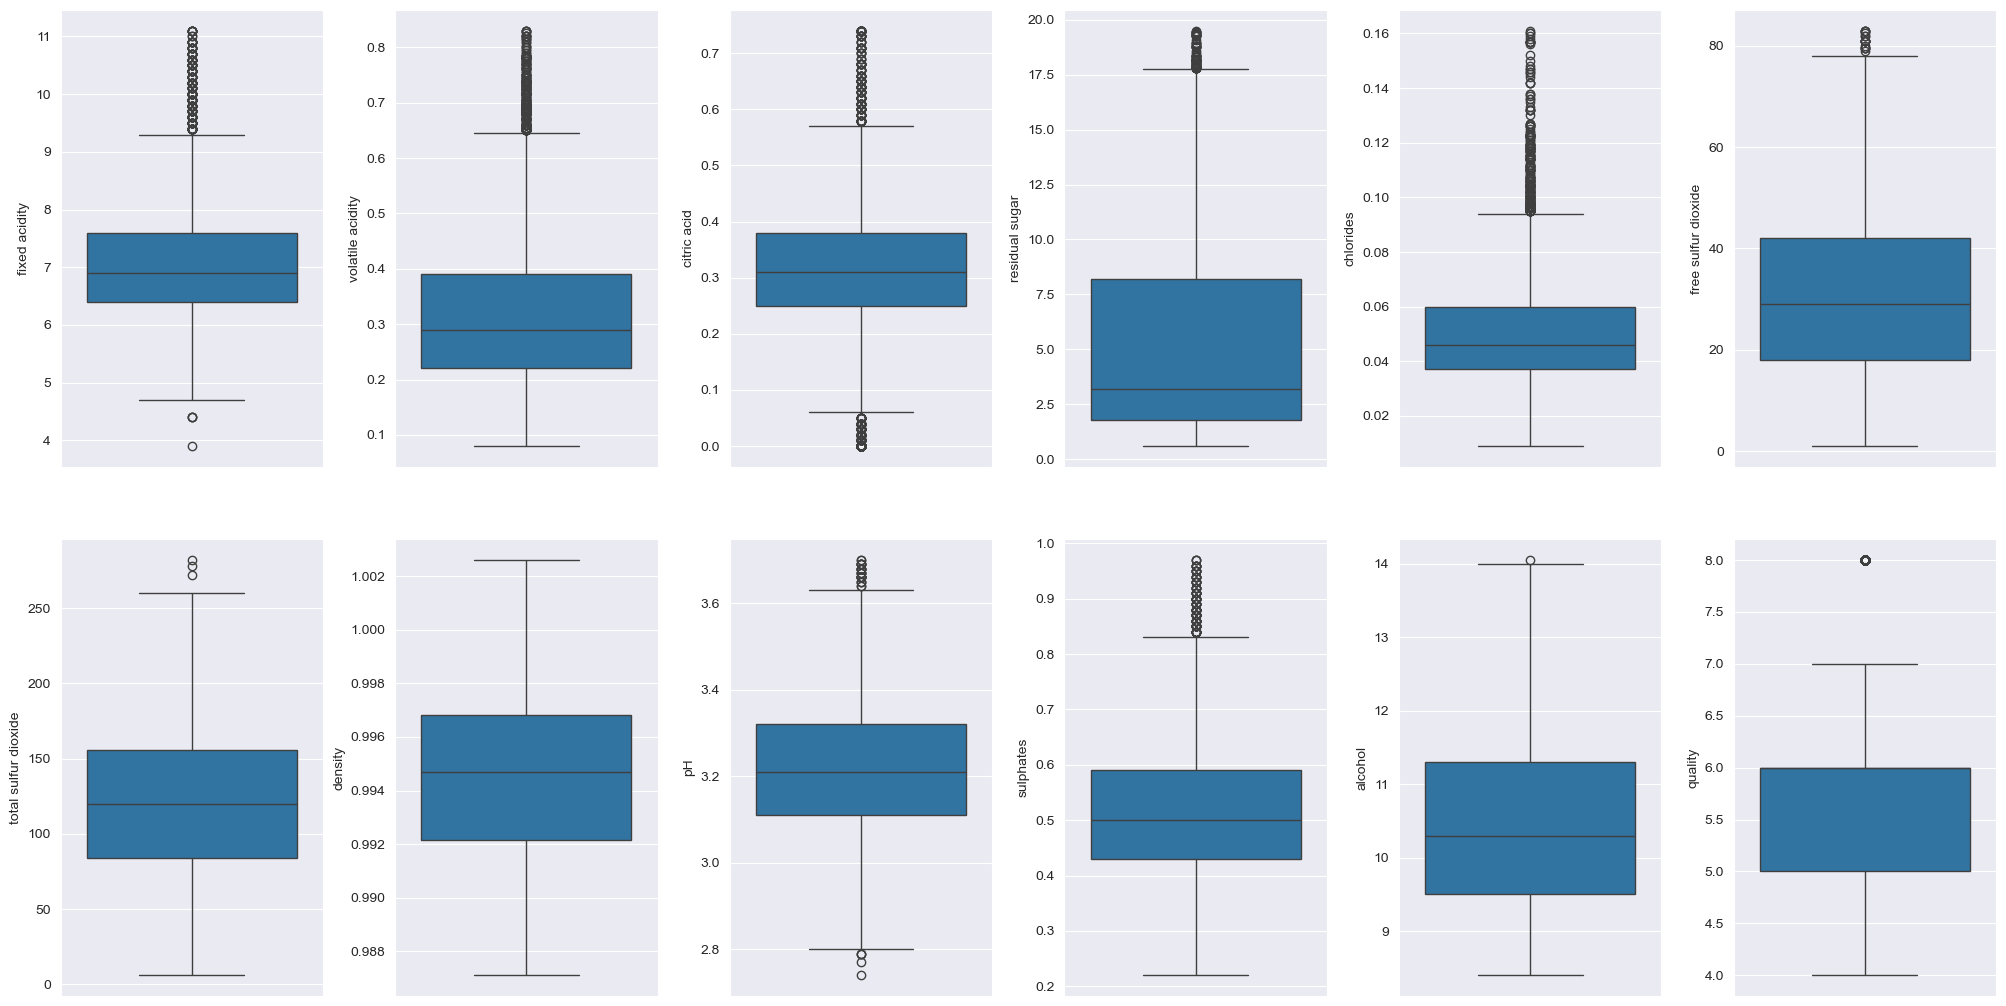

In [10]:
# create box plots
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20, 10))
index = 0
ax = ax.flatten()

for col, value in df_wine.items():
    if col != "type":
        sns.boxplot(y=col, data=df_wine, ax=ax[index])
        index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

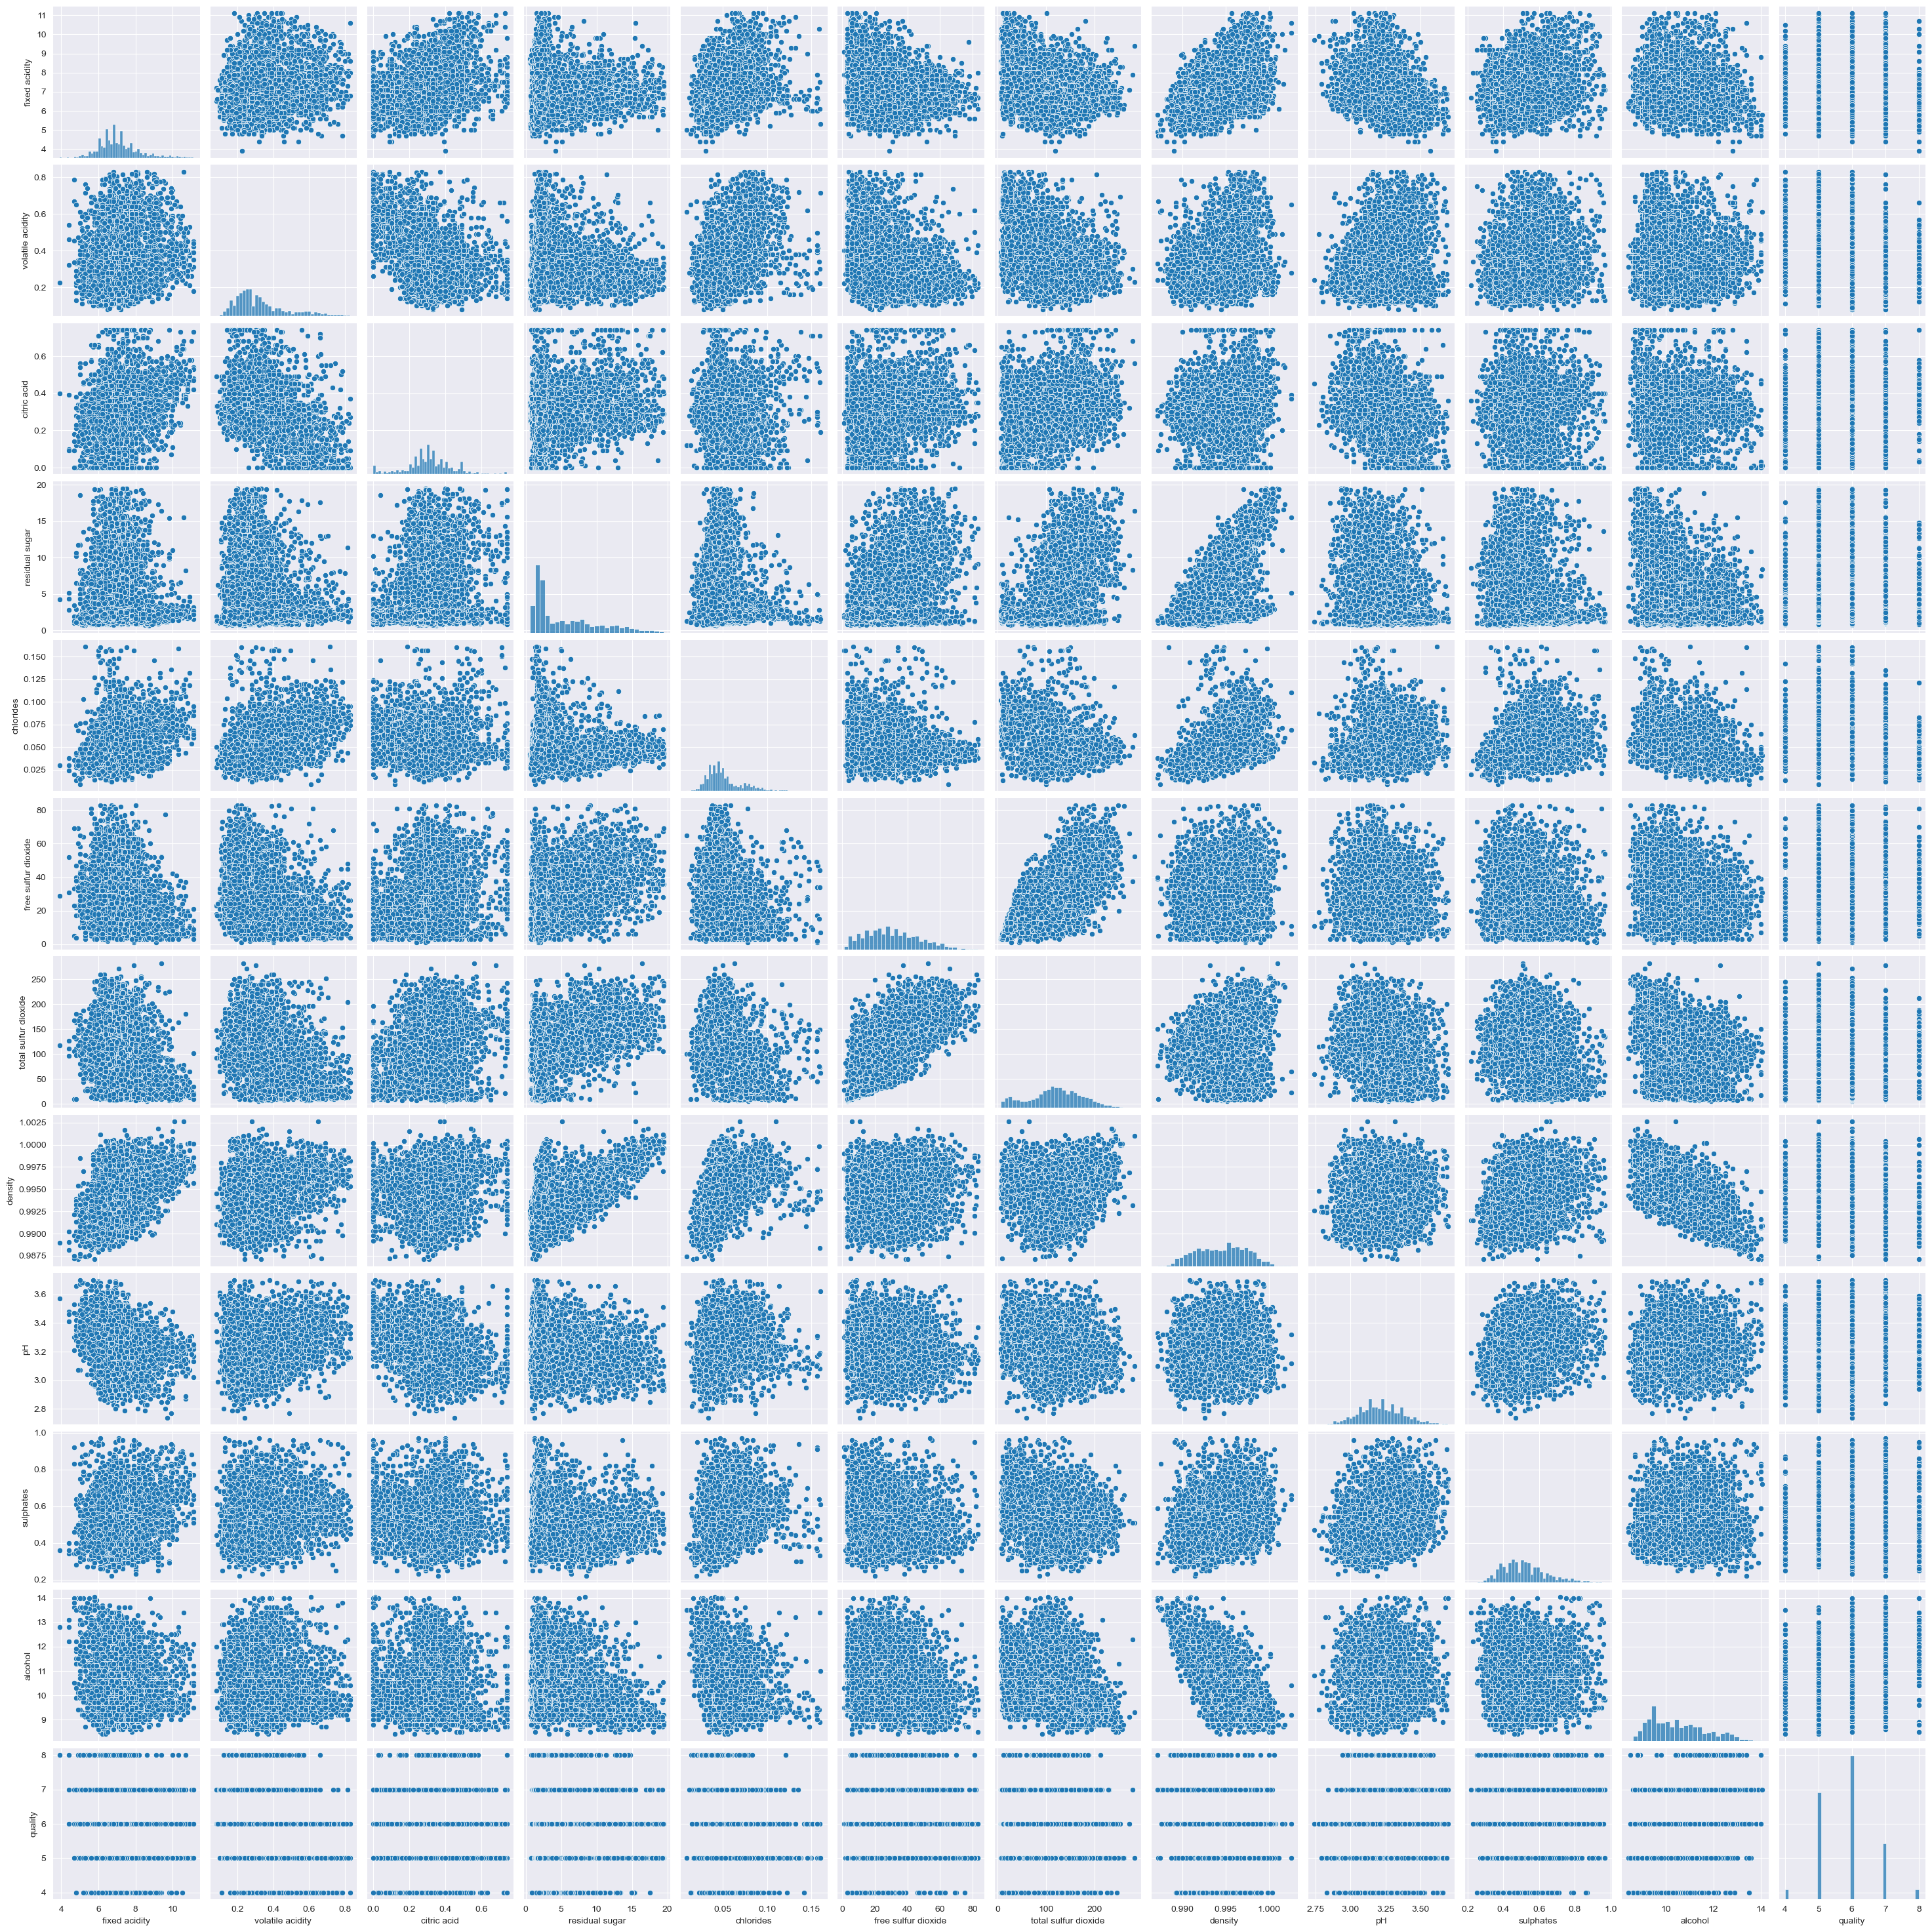

In [11]:
sns.pairplot(df_wine)


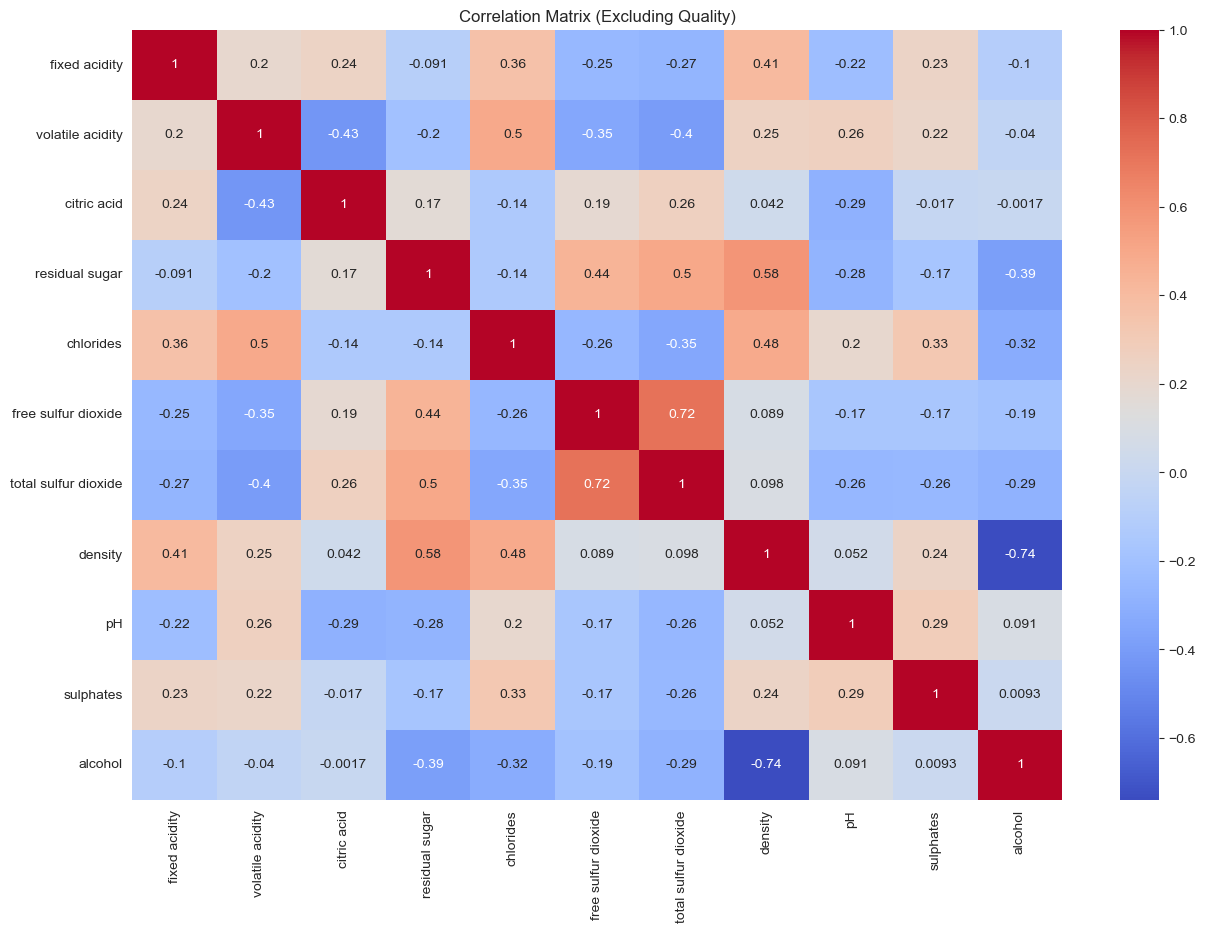

In [12]:
# features correlation
correlation_matrix = df_wine.drop(columns=["quality"]).corr()

plt.subplots(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix (Excluding Quality)")
plt.show()


## Data Preprocessing

In [13]:
# Define features X (all features except quality)
X = np.asarray(df_wine.iloc[:, :-1])

# Define target y (quality)
y = np.asarray(df_wine["quality"])


In [14]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [15]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [16]:
print("Train set:", X_train.shape, y_train.shape)
print("Test set:", X_test.shape, y_test.shape)


Train set: (4791, 11) (4791,)
Test set: (1198, 11) (1198,)


## Model Selection & Validation

### Support Vector Machines (SVM)

In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from scipy.stats import uniform

model_svm = SVC(random_state=0)

param_distributions = {
    # 'C': uniform(0.1, 10),
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'degree': [2, 3, 4],
}

random_search = RandomizedSearchCV(
    estimator=model_svm,
    param_distributions=param_distributions,
    n_iter=50,
    scoring='accuracy',
    cv=10,
    random_state=0,
    n_jobs=-1
)
random_search.fit(X_train, y_train)

print("Best parameters found: ", random_search.best_params_)
print("Best cross-validation accuracy: ", random_search.best_score_)


D:\Anaconda\envs\MLE\lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best parameters found:  {'kernel': 'rbf', 'gamma': 'scale', 'degree': 3, 'C': 10}
Best cross-validation accuracy:  0.588607341684064


In [18]:
from sklearn.svm import SVC

model_svm = SVC(kernel="rbf", gamma="scale", C=10, random_state=0)
model_svm.fit(X_train, y_train)

y_pred = model_svm.predict(X_test)


In [19]:
acc_svm = accuracy_score(y_test, y_pred)
print("SVM Model Accuracy:", acc_svm)


SVM Model Accuracy: 0.5893155258764607


In [20]:
accuracy_cv_svm = cross_val_score(model_svm, X, y, scoring="accuracy", cv=5)
print("SVM Model K-fold CV (K=5) Accuracy:", accuracy_cv_svm)
print("SVM Model K-fold CV (K=5) Mean Accuracy:", accuracy_cv_svm.mean())


SVM Model K-fold CV (K=5) Accuracy: [0.43572621 0.4624374  0.4933222  0.47996661 0.35254804]
SVM Model K-fold CV (K=5) Mean Accuracy: 0.4448000914919463


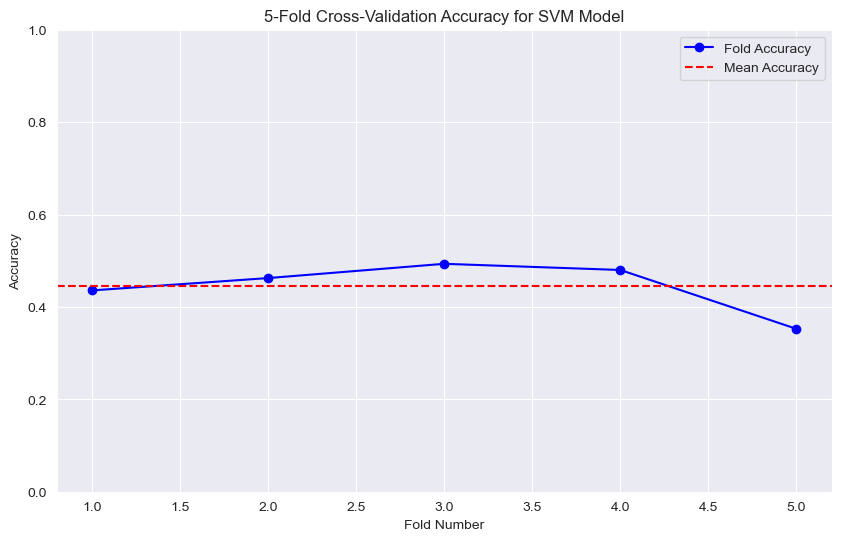

In [22]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 6), accuracy_cv_svm, marker='o', linestyle='-', color='b', label="Fold Accuracy")
plt.axhline(accuracy_cv_svm.mean(), color='r', linestyle='--', label="Mean Accuracy")

plt.xlabel("Fold Number")
plt.ylabel("Accuracy")
plt.title("5-Fold Cross-Validation Accuracy for SVM Model")
plt.ylim([0, 1])
plt.grid(True)
plt.legend()
